In [21]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
from typing import Union


def gaussian_beam_width(z: Union[float, np.ndarray], w_0: float , z_0: float, Msq: float, wavelength: float) -> Union[float, np.ndarray]:
        """ Returns the gaussian beam width based on a gaussian beam propagation
        
        Note that this function is normalized if:
        - Everything is in SI-Units, or
        - w, w_0: [um], z, z_0: [mm], lmbda: [nm] (preferred)


        Args:
            z (Union[float, np.ndarray]): Position in propagation direction [m, mm]
            w_0 (float): Beam waist                                         [m, um]
            z_0 (float): Position of beam waist                             [m, mm]
            Msq (float): M-squared beam quality factor                      [no unit]
            wavelength (float): Wavelength of light                         [m, nm]

        Returns:
            float: Gaussian beam width [m, um]
        """

        return w_0 * np.sqrt(
            1 + ((z - z_0)**2)*((
                (Msq * wavelength)/
                (np.pi * (w_0**2))
            )**2)
        )

In [3]:
def intensity(x, y, z):
    I0 = 1
    w_x = gaussian_beam_width(z = z, w_0 = 25e-6, z_0 = 0, Msq = 1, wavelength = 1064e-9)
    w_y = w_x
    return I0 * np.exp(-2*((x/w_x)**2 + (y/w_y)**2))

In [55]:
def integrate_over_time(xs, y, z, numsamples, deviation):
    # xs = np.linspace(start = -100, stop = 100, endpoint = True, num = 401) * 1e-6
    # For every x in xs, we have some time t from 0 to 1, scaled according to the period

    xs_t = xs[:, np.newaxis]

    # sample t from 0 to 1
    ts     = np.linspace(start = 0, stop = 1, endpoint = True, num = numsamples)
    f_of_t = intensity(x = xs_t - deviation * np.sin(2*np.pi*ts), y = y, z = z)
    integrated = scipy.integrate.simpson(y = f_of_t, x = ts)

    return integrated

In [56]:
xs = np.linspace(start = -100, stop = 100, endpoint = True, num = 401) * 1e-6
y = 0
z = 0
integration_results = integrate_over_time(xs = xs, y = y, z = z, numsamples = 100, deviation = 25e-6)

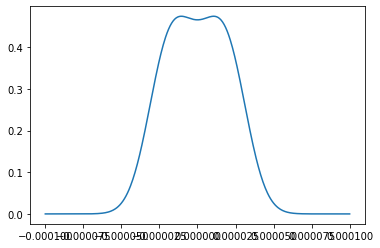

In [57]:
fig, ax = plt.subplots(1, 1)
ax.plot(xs, integration_results)
plt.show()